# import libraries

In [1]:
import numpy as np
from PIL import Image  

### 1. Napisz funkcje rysuj_ramki_szare(w,h,grub, ?) oraz  rysuj_pasy_pionowe_szare(w,h,grub. ?) analogiczne do rysuj_ramki(w,h,grub) oraz rysuj_pasy_pionowe(w,h,grub) w wyniku których otrzymasz obraz w trybie L  taki, że zamiast czarnego i białego koloru pojawiają się odcienie szarości (według własnego uznania, ale według ustalonej reguły, którą trzeba będzie opisać). Zastosuj te funkcje a otrzymane obrazy (przyjmij w = 300, h=200, grub = 5) wklej do raportu.  Zapisz obrazy w formacie png i wstaw na Moodle.

### Zastosowałem podobną funkcję jak rysuj_pasy_pionowe(), z tą różnicą, że kolor '0' został zastąpiony kolorem przekazanym jako argument, w tym przypadku szarym

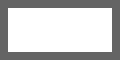

In [2]:
def rysuj_ramke_szare(w, h, grub, kolor_ramki): 
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    tab[:] = kolor_ramki  
    tab[grub : h-grub, grub : w-grub] = 255 
    return Image.fromarray(tab)


zad1_1 = rysuj_ramke_szare(120, 60, 8, 100)
zad1_1.save('zad1_1.png')

zad1_1 

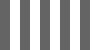

In [3]:
def rysuj_pasy_pionowe_szare(w: int,h: int,grub: int, kolor_pasow):
    table = np.ones((h,w), dtype = np.uint8) * 255
    
    for index in range(0, w, grub * 2):
        
        table[: , index : index + grub ] = kolor_pasow
    
    return Image.fromarray(table)

w = 100
h = 50
grub = 10
kolor_pasow = 100

zad1_2 = rysuj_pasy_pionowe_szare(w, h, grub, kolor_pasow)
zad1_2.save('zad1_2.png')

zad1_2

###  2. Napisz funkcję negatyw(obraz), która rozpoznaje tryb wczytanego obrazu i jeśli jest jeden z trybów (‘1’, ‘L’, ‘RGB’) to tworzy jego negatyw. Zastosuj funkcję do następujących obrazów 

#### a) gwiazdka.bmp 

In [4]:
def negatyw(image):  
    image_table = np.asarray(image, dtype = np.uint8)
    result = image_table.copy()
    
    if image.mode == 'RGB':
        h, w, rgb = image_table.shape
        for i in range(h):
            for j in range(w):
                for k in range(rgb):
                    result[i, j, k] = 255 - image_table[i, j, k]
                    
    elif image.mode == '1' or image.mode == 'L':
        h, w = image_table.shape
        for i in range(h):
            for j in range(w):
                result[i, j] = 255 - image_table[i, j]
                
    return Image.fromarray(result)


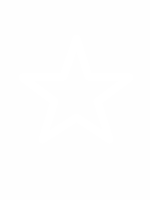

In [5]:
gwiazdka = Image.open('gwiazdka.bmp')


negative_image = negatyw(gwiazdka)

negative_image.save('zad2_1.png')

negative_image

#### b) rysuj_ramki_kolorowe(200, [20, 120,220], a, b, c)

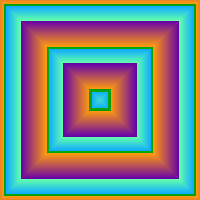

In [6]:
def rysuj_ramki_kolorowe(w, kolor, zmiana_koloru_r, zmiana_koloru_g, zmiana_koloru_b):
    t = (w, w, 3)
    tab = np.zeros(t, dtype=np.uint8)
    kolor_r = kolor[0]
    kolor_g = kolor[1]
    kolor_b = kolor[2]
    z = w
    for k in range(int(w / 2)):
        for i in range(k, z - k):
            for j in range(k, z - k):
                tab[i, j] = [kolor_r, kolor_g, kolor_b]
        kolor_r = (kolor_r - zmiana_koloru_r) % 256
        kolor_g = (kolor_g - zmiana_koloru_g) % 256
        kolor_b = (kolor_b - zmiana_koloru_b) % 256
    return Image.fromarray(tab)

zad2_2 = negatyw(rysuj_ramki_kolorowe(200, [20, 120,220], 6, 6, -6))
zad2_2.save('zad2_2.png')

zad2_2

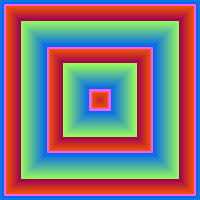

In [7]:
rysuj_ramki_kolorowe(200, [20, 120,220], 6, 6, -6)

#### c) rysuj_po_skosie_szare(100, 300, a, b)  gdzie a = liczba liter w imieniu, b = liczba liter w nazwisku, c = -a

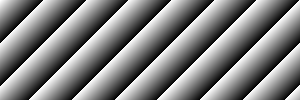

In [8]:
def rysuj_po_skosie_szare(h,w, a, b):  
    t = (h, w) # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            tab[i, j] = (a*i + b*j) % 256 
    return Image.fromarray(tab)

zad2_3 = negatyw(rysuj_po_skosie_szare(100, 300, 6, 6))
zad2_3.save('zad2_3.png')

zad2_3

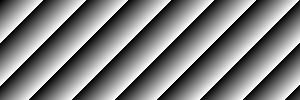

In [9]:
rysuj_po_skosie_szare(100, 300, 6, 6)

#### Otrzymane obrazy (oryginalny i negatyw) wklej do raportu. Negatywy zapisz w formacie png i wstaw na Moodle.

###  3. Napisz funkcję koloruj_w_paski(obraz, grub, ?) , która dla danego obrazu w trybie ‘1’ (np. czarne kształty na białym tle) tworzy obraz w trybie ‘RGB’, w którym tło jest białe a kształty są pokolorowane w kolorowe poziome paski grubości grub. Sposób kolorowania (zmianę koloru) proszę wcześniej opisać i ewentualnie uwzględnić w argumentach funkcji.
#### a) Wykonaj funkcję koloruj_w_paski(obraz, grub, ?) , gdzie obraz to czarno-biały obraz z inicjałami własnymi z lab1. Następnie zapisz w formacie jpg oraz png. Czy otrzymane obrazy są takie same? Dlaczego tak się dzieje?
#### Otrzymany obraz wklej do raportu. W raporcie uzasadnij odpowiedź. Zapisane obrazy wstaw na Moodle

In [10]:
image_signature = Image.open('an.bmp')
image_signature.mode

'1'

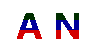

In [11]:

def koloruj_w_paski(image, grub, colors):
    if image.mode != '1':
        raise ValueError("Image not in 'black-white' mode")
        
    image_rgb = image.convert("RGB")
    pix = image_rgb.load()

    w, h = image.size

    for h_index in range(h):
        for w_index in range(w):
            if pix[w_index, h_index] == (0, 0, 0):  
                stripe_color = colors[(h_index // grub) % len(colors)]
                pix[w_index, h_index] = stripe_color
            else:
                pix[w_index, h_index] = (255, 255, 255)  

    return image_rgb


colors = [(212, 0, 0), (0, 45, 0), (0, 0, 155)]


an_with_colors = koloruj_w_paski(image_signature, grub=10, colors=colors)

an_with_colors.save('an_straps.jpg')
an_with_colors.save('an_straps.png')

an_with_colors

### Czy obrazy PNG i JPG są takie same? Dlaczego tak się dzieje?

In [12]:
image_jpg = Image.open('an_straps.jpg')
image_png = Image.open('an_straps.png')

AN JPG image
tryb: RGB
format: JPEG
rozmiar: (100, 50)
typ danych tablicy: uint8
rozmiar tablicy: (50, 100, 3)
liczba elementow: 15000
wymiar tablicy: 3
rozmiar wyrazu tablicy: 1


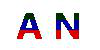

In [13]:
an_jpg_table = np.asarray(image_jpg)
print('AN JPG image')
print("tryb:", image_jpg.mode)
print("format:", image_jpg.format)
print("rozmiar:", image_jpg.size)
print("typ danych tablicy:", an_jpg_table.dtype)  
print("rozmiar tablicy:", an_jpg_table.shape)  
print("liczba elementow:", an_jpg_table.size)  
print("wymiar tablicy:", an_jpg_table.ndim)  
print("rozmiar wyrazu tablicy:",
      an_jpg_table.itemsize)
image_jpg

AN PNG image
tryb: RGB
format: PNG
rozmiar: (100, 50)
typ danych tablicy: uint8
rozmiar tablicy: (50, 100, 3)
liczba elementow: 15000
wymiar tablicy: 3
rozmiar wyrazu tablicy: 1


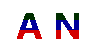

In [14]:
an_png_table = np.asarray(image_png)
print('AN PNG image')
print("tryb:", image_png.mode)
print("format:", image_png.format)
print("rozmiar:", image_png.size)
print("typ danych tablicy:", an_png_table.dtype)  
print("rozmiar tablicy:", an_png_table.shape)  
print("liczba elementow:", an_png_table.size)  
print("wymiar tablicy:", an_png_table.ndim)  
print("rozmiar wyrazu tablicy:",
      an_png_table.itemsize)
image_png

#### Przy porównywaniu właściwości obrazków i ich tablic różnicy nie było widać,ale różnica jest: 
* Zwykle obraz JPEG zajmuje mniej miejsca, chociaż w naszym przypadku obraz w JPEG(1749 bajt) zajmuje więcej miejsca w bajtach niż obraz w trybie PNG(406 bajt). 
* Przy ściśnięciu obrazu JPG mogą pojawić się artefakty na obrazie, a w PNG pozostaje jakość obrazu. 
* Zwykle obraz w trybie JPEG ma 3 kanaly koloru(RGB), gdy PNG może mieć ich więćej(RGB, RGBA).

### 4. Jak działa typ uint8 w przypadku, gdy podana wartość koloru przekracza 255 lub jest ujemna? Jaka wartość będzie, gdy podamy a) 328 b) -24 ? W raporcie zapisz uzasadnienie odpowiedzi.

#### Overflow or Underflow
* Jeżeli będzie podana wartość większa niż 255 to zapisze się następna wartość: (podana wartość) % 255 
* Jeżeli będzie podana wartość ujemna to zapisze się następna wartość: -(podana wartość) + 256 

#### a) 328: 
* zapisana wartość = 328 % 256 = 72
#### b) -24: 
* zapisana watość = -24 + 256 = 232